In [322]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import sklearn
import random


In [323]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [324]:
filename = 'Dataset/Sensor_Discrimination_normalized.csv'
df=pd.read_csv(filename)
# shuffle the DataFrame rows
df = df.sample(frac = 1) #frac = fraction
dataset=df.iloc[:,:-1]
label=df.iloc[:,-1]
print(dataset)
print(label)

            F2        F3        F1       F11        F4        F6       F10  \
1964  0.138139  0.904273  0.779236  0.296809  0.876601  0.572567  0.718185   
137   0.412834  0.816790  0.692067  0.180674  0.897555  0.378230  0.170971   
326   0.804492  0.553331  0.321841  0.173156  0.412772  0.047636  0.189571   
1375  0.481925  0.556191  0.351420  0.205319  0.525362  0.078505  0.278050   
1754  0.821818  0.570659  0.341626  0.214539  0.490271  0.096289  0.289345   
...        ...       ...       ...       ...       ...       ...       ...   
1374  0.530481  0.543237  0.336533  0.217376  0.486779  0.070451  0.264872   
1722  0.817326  0.603970  0.349853  0.194326  0.483951  0.044283  0.273908   
972   0.211508  0.974428  0.962977  0.334043  0.990354  0.772128  0.920745   
114   0.469733  0.486709  0.238198  0.124876  0.427906  0.037246  0.177861   
1744  0.824171  0.578735  0.377277  0.203901  0.473973  0.037905  0.259036   

            F9        F5       F7     F12       F8  
1964  0.36

# RFE implement

In [325]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


estimator = SVR(kernel="linear")
model = RFE(estimator, n_features_to_select=6, step=1)
model.fit(dataset,label)



RFE(estimator=SVR(kernel='linear'), n_features_to_select=6)

In [326]:

compressed_dataset_X= model.transform(dataset) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X[0]))
print(compressed_dataset_X)

<class 'numpy.ndarray'>
6
[[0.90427322 0.77923604 0.29680851 0.8766007  0.36989457 0.32534495]
 [0.81679004 0.6920666  0.18067376 0.8975553  0.38656775 0.43572985]
 [0.55333109 0.32184133 0.17315603 0.41277233 0.09390863 0.09219317]
 ...
 [0.97442799 0.96297747 0.33404255 0.99035423 0.78328778 0.87581699]
 [0.48670929 0.23819785 0.12487589 0.4279062  0.09246388 0.09974582]
 [0.57873486 0.37727718 0.20390071 0.47397306 0.08625537 0.07091503]]


In [327]:
dataset_arr=dataset.to_numpy()


In [328]:
# from NecessaryModules.splitData import split_data
X_train, X_test, y_train, y_test = train_test_split(dataset_arr, label, test_size=0.3, random_state=42)
print(len(X_train))

1548


In [329]:
compressed_dataset_X_train= model.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= model.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
1548
[[0.84825034 0.87286974 0.2108156  0.88524863 0.40765326 0.39034132]
 [0.94734186 0.72497551 0.40780142 0.94777981 0.42288169 0.36383442]
 [0.87062584 0.85053869 0.19822695 0.81922501 0.25642327 0.28013798]
 ...
 [0.95205249 0.75200784 0.40301418 0.91401962 0.45763374 0.39615105]
 [0.56763122 0.30695397 0.17819149 0.40129719 0.11105037 0.09175744]
 [0.51514132 0.24015671 0.17748227 0.37502079 0.07196408 0.04386347]]
<class 'numpy.ndarray'>
664
[[0.8859354  0.79373164 0.22269504 0.84084484 0.21354939 0.27923021]
 [0.92008748 0.72693438 0.40035461 0.94445368 0.44474815 0.35461147]
 [0.862214   0.87071499 0.21471631 0.80675204 0.21733698 0.2942992 ]
 ...
 [0.97493271 0.9698335  0.93156028 0.86678862 0.4666146  0.52251271]
 [0.84942799 0.76493634 0.1998227  0.92083818 0.29550957 0.31427015]
 [0.80047106 0.61684623 0.19734043 0.53733577 0.16255369 0.14894699]]


# tune D tree for AdaBoost

In [330]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)

model_dt.fit(compressed_dataset_X_train, y_train)

DecisionTreeClassifier(max_depth=12, max_features='sqrt')

In [331]:
# Finding mean absolute error
preds = model_dt.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.11746987951807229

In [332]:
# Defining the best parameter with optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)


train_tunned_dt = np.array(compressed_dataset_X)
target_train_tunned_dt = np.array(label)

# test = np.array(X)
# target_train = df_train['congestion'].values

# test_preds = np.zeros((len(test)))
oof_preds_dt = np.zeros((len(train_tunned_dt)))
abs_error_arr_dt=[]
def objective(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,label)):
    train_X, valid_X = train_tunned_dt[train_index], train_tunned_dt[val_index]
    train_Y, valid_Y = target_train_tunned_dt[train_index], target_train_tunned_dt[val_index]
    
        
        # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=0)
    param = {
        'criterion':trial.suggest_categorical('criterion',["gini", "entropy", "log_loss"]), #The function to measure the quality of a split.
        'splitter':trial.suggest_categorical('splitter',["best", "random"]),
        'max_features':trial.suggest_categorical('max_features',['sqrt','log2',1,2,3,4,5,6,7,8,9,10,11]), #a categorical value can be an integer
        'random_state':trial.suggest_int('random_state',0,5),


        }
    model = DecisionTreeClassifier(**param)  
        
    model.fit(train_X,train_Y)
        
    preds = model.predict(valid_X)
    oof_preds_dt[val_index] = preds # preds gives total 3846 predicted value for valid_X


 
#  print(len(oof_preds_dt))
      
 mae = mean_absolute_error(target_train_tunned_dt, oof_preds_dt)
        
 return mae

In [333]:
# this is the main optuna for optimizing a object-->"objective"
study = optuna.create_study(direction='minimize')

[I 2024-02-11 23:46:50,377] A new study created in memory with name: no-name-07919182-ac6c-489f-a7d7-4a2396c3dcbb


In [334]:

study.optimize(objective, n_trials=100) # 150 bar "objective" object ke trial kore kore dekhbe, here total 5*100=750
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-02-11 23:46:50,415] Trial 0 finished with value: 0.162748643761302 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_features': 'sqrt', 'random_state': 1}. Best is trial 0 with value: 0.162748643761302.
[I 2024-02-11 23:46:50,485] Trial 1 finished with value: 0.1383363471971067 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 10, 'random_state': 4}. Best is trial 1 with value: 0.1383363471971067.
[I 2024-02-11 23:46:50,560] Trial 2 finished with value: 0.12793851717902352 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_features': 11, 'random_state': 1}. Best is trial 2 with value: 0.12793851717902352.
[I 2024-02-11 23:46:50,631] Trial 3 finished with value: 0.12658227848101267 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_features': 7, 'random_state': 4}. Best is trial 3 with value: 0.12658227848101267.
[I 2024-02-11 23:46:50,652] Trial 4 finished with value: 0.15867992766726943 and parameters: {'

[I 2024-02-11 23:46:50,713] Trial 5 finished with value: 0.13698010849909584 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 9, 'random_state': 3}. Best is trial 3 with value: 0.12658227848101267.
[I 2024-02-11 23:46:50,746] Trial 6 finished with value: 0.13969258589511754 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 2, 'random_state': 2}. Best is trial 3 with value: 0.12658227848101267.
[I 2024-02-11 23:46:50,754] Trial 7 finished with value: 0.1550632911392405 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_features': 2, 'random_state': 4}. Best is trial 3 with value: 0.12658227848101267.
[I 2024-02-11 23:46:50,796] Trial 8 finished with value: 0.13381555153707053 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_features': 2, 'random_state': 4}. Best is trial 3 with value: 0.12658227848101267.
[I 2024-02-11 23:46:50,811] Trial 9 finished with value: 0.1360759493670886 and parameters: {'criter

Number of finished trials: 100
Best trial: {'criterion': 'entropy', 'splitter': 'best', 'max_features': 4, 'random_state': 0}


In [335]:
#evaluate the DT trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.11889692585895117
  Params: 
    criterion: entropy
    splitter: best
    max_features: 4
    random_state: 0


# tune ada-boost

In [336]:
# train the model with random parameter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Preparing the regressor and fitting data with some parameters
dt_params = study.best_trial.params
model_dt = DecisionTreeClassifier(**dt_params)

# base_estimator = DecisionTreeClassifier(max_depth=1)

model_Ada = AdaBoostClassifier(
        estimator=model_dt,
        n_estimators=180, # maximum number of estimators at which boosting is terminated
        learning_rate=1.2,
        algorithm="SAMME", #SAMME.R=real boosting algorithm
        
     )

model_Ada.fit(compressed_dataset_X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_features=4,
                                                    random_state=0),
                   learning_rate=1.2, n_estimators=180)

In [337]:
# Finding mean absolute error
preds = model_Ada.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.11295180722891567

In [338]:
# Defining the best parameter with optuna

K = 5 # 5 fold cross validation
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)


train_tunned_Ada= np.array(compressed_dataset_X)
target_train_tunned_Ada = np.array(label)

# test = np.array(X)
# target_train = df_train['congestion'].values

# test_preds = np.zeros((len(test)))
oof_preds_Ada = np.zeros((len(train_tunned_Ada)))
abs_error_arr_Ada=[]

def objective_Ada(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,label)):
    train_X, valid_X = train_tunned_Ada[train_index], train_tunned_Ada[val_index]
    train_Y, valid_Y = target_train_tunned_Ada[train_index], target_train_tunned_Ada[val_index]
    
        
        # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=0)
    param = {
            # 'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process 
        'estimator':model_dt,
        'n_estimators':trial.suggest_int("n_estimators",50,500), # maximum number of estimators at which boosting is terminated
        'learning_rate':trial.suggest_float("learning_rate",1,3),
        'algorithm':trial.suggest_categorical("algorithm",["SAMME","SAMME.R"]),
        'random_state':trial.suggest_int('random_state',0,5),
        }
    model_2 = AdaBoostClassifier(**param)  
        
    model_2.fit(train_X,train_Y)
        
    preds = model_2.predict(valid_X)
    oof_preds_Ada[val_index] = preds # preds gives total 3846 predicted value for valid_X

#  abs_error=np.abs(oof_preds-target_train_tunned).mean() 
#  abs_error_arr.append(abs_error)  
#  abs_error=np.abs(oof_preds-target_train).mean()
 
#  print(len(oof_preds))
      
 mae = mean_absolute_error(target_train_tunned_Ada, oof_preds_Ada)
        
 return mae

In [339]:
# this is the main optuna for optimizing a object-->"objective"
study_Ada = optuna.create_study(direction='minimize',study_name="Ada_tunning")

[I 2024-02-11 23:46:55,799] A new study created in memory with name: Ada_tunning


In [340]:

study_Ada.optimize(objective_Ada, n_trials=100) # 150 bar "objective" object ke trial kore kore dekhbe, here total 5*100=750
print('Number of finished trials:', len(study_Ada.trials))
print('Best trial:', study_Ada.best_trial.params)

[I 2024-02-11 23:46:55,890] Trial 0 finished with value: 0.13155515370705245 and parameters: {'n_estimators': 97, 'learning_rate': 1.5837051228118055, 'algorithm': 'SAMME.R', 'random_state': 4}. Best is trial 0 with value: 0.13155515370705245.


[I 2024-02-11 23:46:55,968] Trial 1 finished with value: 0.1252260397830018 and parameters: {'n_estimators': 78, 'learning_rate': 2.021883399720238, 'algorithm': 'SAMME', 'random_state': 0}. Best is trial 1 with value: 0.1252260397830018.
[I 2024-02-11 23:46:56,033] Trial 2 finished with value: 0.1252260397830018 and parameters: {'n_estimators': 50, 'learning_rate': 1.2573013611698542, 'algorithm': 'SAMME', 'random_state': 0}. Best is trial 1 with value: 0.1252260397830018.
[I 2024-02-11 23:46:56,083] Trial 3 finished with value: 0.13200723327305605 and parameters: {'n_estimators': 73, 'learning_rate': 2.8805235266648888, 'algorithm': 'SAMME', 'random_state': 1}. Best is trial 1 with value: 0.1252260397830018.
[I 2024-02-11 23:46:56,149] Trial 4 finished with value: 0.13200723327305605 and parameters: {'n_estimators': 272, 'learning_rate': 1.6970562737301282, 'algorithm': 'SAMME', 'random_state': 1}. Best is trial 1 with value: 0.1252260397830018.
[I 2024-02-11 23:46:56,200] Trial 5 fi

Number of finished trials: 100
Best trial: {'n_estimators': 174, 'learning_rate': 1.7656227238712783, 'algorithm': 'SAMME', 'random_state': 2}


In [341]:

trial = study_Ada.best_trial.params
trial['n_estimators']=300
trial

{'n_estimators': 300,
 'learning_rate': 1.7656227238712783,
 'algorithm': 'SAMME',
 'random_state': 2}

In [342]:
#evaluate the DT trial
print("Number of finished trials: ", len(study_Ada.trials))
print("Best trial:")
trial = study_Ada.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.11301989150090416
  Params: 
    n_estimators: 174
    learning_rate: 1.7656227238712783
    algorithm: SAMME
    random_state: 2


# fit the ada-boost model

In [343]:

K = 5 # 5 fold cross validation
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)

In [344]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train_Ada = np.array(compressed_dataset_X_train)
target_train_Ada = np.array(y_train)

test_Ada = np.array(compressed_dataset_X_test) # or test_Ada = np.array(X)


test_preds_Ada = np.zeros((len(test_Ada)))
oof_preds_Ada = np.zeros((len(train_Ada)))

for train_index, val_index in tqdm(skf.split(compressed_dataset_X_train,y_train), total=5):
    train_X, valid_X = train_Ada[train_index], train_Ada[val_index]
    train_y, valid_y = target_train_Ada[train_index], target_train_Ada[val_index]
    ada_params = study_Ada.best_trial.params
    model_Ada_2 = AdaBoostClassifier(**ada_params,estimator=model_dt)
    model_Ada_2.fit(train_X, train_y)
    # for train accuracy
    preds = model_Ada_2.predict(valid_X)
    oof_preds_Ada[val_index] = preds
    # for test accuracy
    preds = model_Ada_2.predict(test_Ada)
    test_preds_Ada += (preds)/5
print(np.abs(oof_preds_Ada-target_train_Ada).mean())

100%|██████████| 5/5 [00:00<00:00, 81.20it/s]

0.1434108527131783


In [345]:
target_test_Ada = np.array(y_test)

In [346]:
from sklearn.metrics import accuracy_score
test_Acc_MLP=accuracy_score(target_test_Ada,test_preds_Ada.round())
print(test_Acc_MLP)

0.9036144578313253


In [347]:
#validation accuracy

valid_Acc=accuracy_score(target_train_Ada,oof_preds_Ada)
print(valid_Acc)

0.8772609819121447


In [348]:
# train accuracy
train_Acc=model_Ada_2.score(compressed_dataset_X_train,y_train)
print(train_Acc)
# **** over-fitting can be terminated by taking the n_estimator manually and observe loss for each

0.9741602067183462


In [349]:
test_Acc=model_Ada_2.score(compressed_dataset_X_test,y_test)
print(test_Acc)

0.8840361445783133


In [353]:
# trial = study_Ada.best_trial.params
# trial['n_estimators']=300
# trial
# del trial['n_estimators']

In [354]:
trial

{'learning_rate': 1.7656227238712783, 'algorithm': 'SAMME', 'random_state': 2}

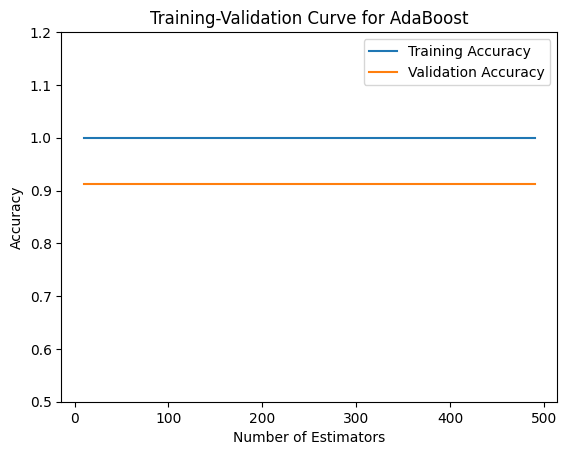

In [355]:
# ########## training-testing curve (with tuned D tree) ############


# Set different values for the number of estimators (weak learners)
# 10, 30, 40, 50, 60, 70, 80, 90, 100, 110,120,130,140,150
n_estimators_values = []

train_scores = []
val_scores = []
# base_estimator = DecisionTreeClassifier(max_depth=1)

# Train AdaBoost classifier with different number of estimators
for n_estimators in range(10,500,20):
    n_estimators_values.append(n_estimators)
    ada_clf = AdaBoostClassifier(estimator=model_dt, n_estimators=n_estimators, **trial)
    ada_clf.fit(compressed_dataset_X_train, y_train)
    
    # Calculate training accuracy
    train_pred = ada_clf.predict(compressed_dataset_X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_pred = ada_clf.predict(compressed_dataset_X_test)
    val_accuracy = accuracy_score(y_test, val_pred)
    val_scores.append(val_accuracy)

# Plot training-validation curve
plt.plot(n_estimators_values, train_scores, label='Training Accuracy')
plt.plot(n_estimators_values, val_scores, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.2)
plt.title('Training-Validation Curve for AdaBoost')
plt.legend()
plt.show()


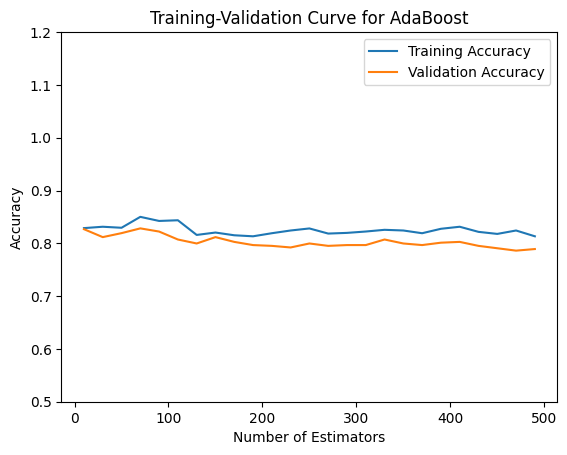

In [356]:
# ########## training-testing curve ############


# Set different values for the number of estimators (weak learners)
# 10, 30, 40, 50, 60, 70, 80, 90, 100, 110,120,130,140,150
n_estimators_values = []

train_scores = []
val_scores = []
base_estimator = DecisionTreeClassifier(max_depth=1)

# Train AdaBoost classifier with different number of estimators
for n_estimators in range(10,500,20):
    n_estimators_values.append(n_estimators)
    ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators, **trial)
    ada_clf.fit(compressed_dataset_X_train, y_train)
    
    # Calculate training accuracy
    train_pred = ada_clf.predict(compressed_dataset_X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_pred = ada_clf.predict(compressed_dataset_X_test)
    val_accuracy = accuracy_score(y_test, val_pred)
    val_scores.append(val_accuracy)

# Plot training-validation curve
plt.plot(n_estimators_values, train_scores, label='Training Accuracy')
plt.plot(n_estimators_values, val_scores, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.2)
plt.title('Training-Validation Curve for AdaBoost')
plt.legend()
plt.show()


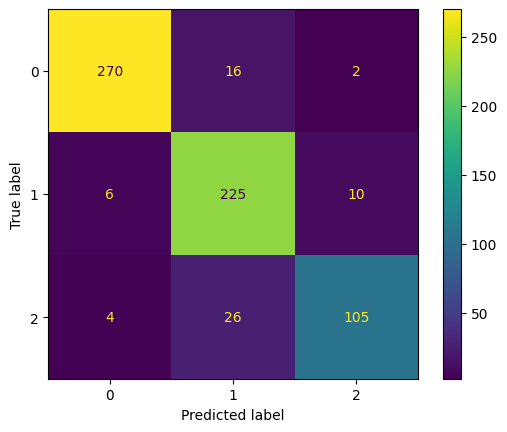

In [357]:
############# plot confusion matrix ############

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_Ada.round())
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.pink)
